In [14]:
!pip install nltk wordcloud


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
df = pd.read_csv('Reviews_Sample.csv')
df = df[['Text']]
df.dropna(inplace=True)
df.head()

,Text
0,Having tried a couple of other brands of glute...
1,My cat loves these treats. If ever I can't fin...
2,A little less than I expected. It tends to ha...
3,"First there was Frosted Mini-Wheats, in origin..."
4,and I want to congratulate the graphic artist ...


In [17]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
pattern = re.compile(r'[^a-zA-Z]')

def clean_text(text):
    text = pattern.sub(' ', text).lower().split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['clean_text'] = df['Text'].apply(clean_text)


In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

# Take small sample for fast processing
df_small = df.sample(3000, random_state=42).copy()

sia = SentimentIntensityAnalyzer()
scores = df_small['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

df_small['Sentiment'] = np.where(scores > 0, 'Positive',
                          np.where(scores < 0, 'Negative', 'Neutral'))

df_small.head()


,Text,clean_text,Sentiment
165256,Having tried a couple of other brands of glute...,tried couple brands gluten free sandwich cooki...,Positive
231465,My cat loves these treats. If ever I can't fin...,cat loves treats ever find house pop top bolts...,Positive
427827,A little less than I expected. It tends to ha...,little less expected tends muddy taste expecte...,Positive
433954,"First there was Frosted Mini-Wheats, in origin...",first frosted mini wheats original size froste...,Positive
70260,and I want to congratulate the graphic artist ...,want congratulate graphic artist putting entir...,Positive


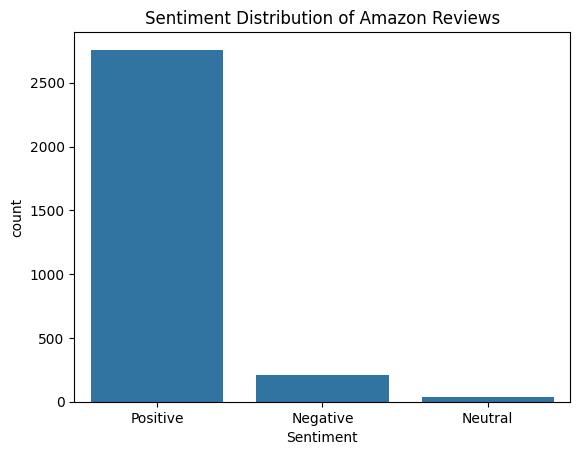

In [19]:
sns.countplot(x='Sentiment', data=df_small)
plt.title("Sentiment Distribution of Amazon Reviews")
plt.show()

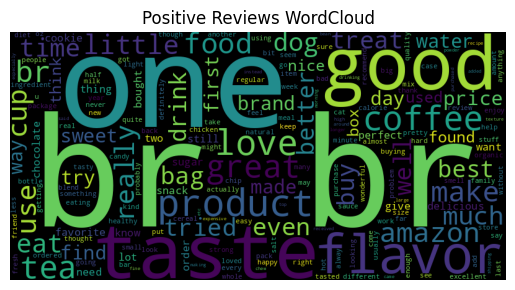

In [20]:
positive_text = " ".join(df_small[df_small['Sentiment']=='Positive']['clean_text'])

wordcloud = WordCloud(width=800, height=400).generate(positive_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()

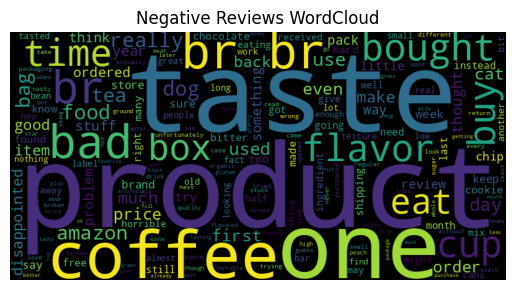

In [21]:
negative_text = " ".join(df_small[df_small['Sentiment']=='Negative']['clean_text'])

wordcloud = WordCloud(width=800, height=400).generate(negative_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()


Insights:

1.Majority of reviews are Positive/Negative (based on graph).

2.Positive reviews contain words like: good, taste, love, best.

3.Negative reviews contain words like: bad, disappointed, waste.

4.Customers mainly appreciate product quality and taste.

5.Complaints are related to packaging and delivery

In [22]:
df_small.to_csv('Reviews_Sample.csv', index=False)